In [1]:
import numpy as np 
import pandas as pd

import os, sys, copy
# print(os.listdir("../input"))

import warnings
warnings.filterwarnings("ignore")

import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import get_cmap
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

from scipy.stats import norm

In [2]:
%load_ext autoreload
%autoreload 2
from utils.dataloader import DataLoader
from utils.imgplots import plot_two_imgs_by_channel

In [60]:
!./utils/gitpull.sh

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/sutt/sirna-utils
   1b6347b..5d6da74  master     -> origin/master
Updating 1b6347b..5d6da74
Fast-forward
 dataloader.py | 3 ++-
 1 file changed, 2 insertions(+), 1 deletion(-)
HEAD is now at 5d6da74 file typo protocol


### Build the analysis plots you want

\[x] negative controls, dif sites

\[x] negative controls, dif experiments

\[ ] two of the same sirna, at dif sites

\[ ] two of the same sirna, dif experiments

In [18]:
# from utils.dataloader import DataLoader
dc = DataLoader()
np.random.seed(17)

##### negative control, dif sites

In [17]:
exps = dc.train.groupby(['experiment']).count().index.tolist()
print(exps )

['HEPG2-01', 'HEPG2-02', 'HEPG2-03', 'HEPG2-04', 'HEPG2-05', 'HEPG2-06', 'HEPG2-07', 'HUVEC-01', 'HUVEC-02', 'HUVEC-03', 'HUVEC-04', 'HUVEC-05', 'HUVEC-06', 'HUVEC-07', 'HUVEC-08', 'HUVEC-09', 'HUVEC-10', 'HUVEC-11', 'HUVEC-12', 'HUVEC-13', 'HUVEC-14', 'HUVEC-15', 'HUVEC-16', 'RPE-01', 'RPE-02', 'RPE-03', 'RPE-04', 'RPE-05', 'RPE-06', 'RPE-07', 'U2OS-01', 'U2OS-02', 'U2OS-03']


In [21]:
rand_exp = np.random.choice(exps, 1)[0]
rand_exp

'HUVEC-16'

In [27]:
neg_df = dc.get_neg_controls_df(rand_exp, plate=1)
neg_df

id_code experiment  plate well  sirna         well_type
2731  HUVEC-16_1_B02   HUVEC-16      1  B02   1138  negative_control

In [45]:
neg_ida = dc.train_id_to_ida(neg_df['id_code'].tolist()[0])
neg_ida

{'experiment': 'HUVEC-16', 'plate': '1', 'well': 'B02'}

In [48]:
neg_idcs = dc.ida_to_idcs(neg_ida)
# neg_idcs

In [49]:
neg_l_l_imgs = dc.load_img_from_l_idc(neg_idcs)

columns are different batches: TODO - implement col names


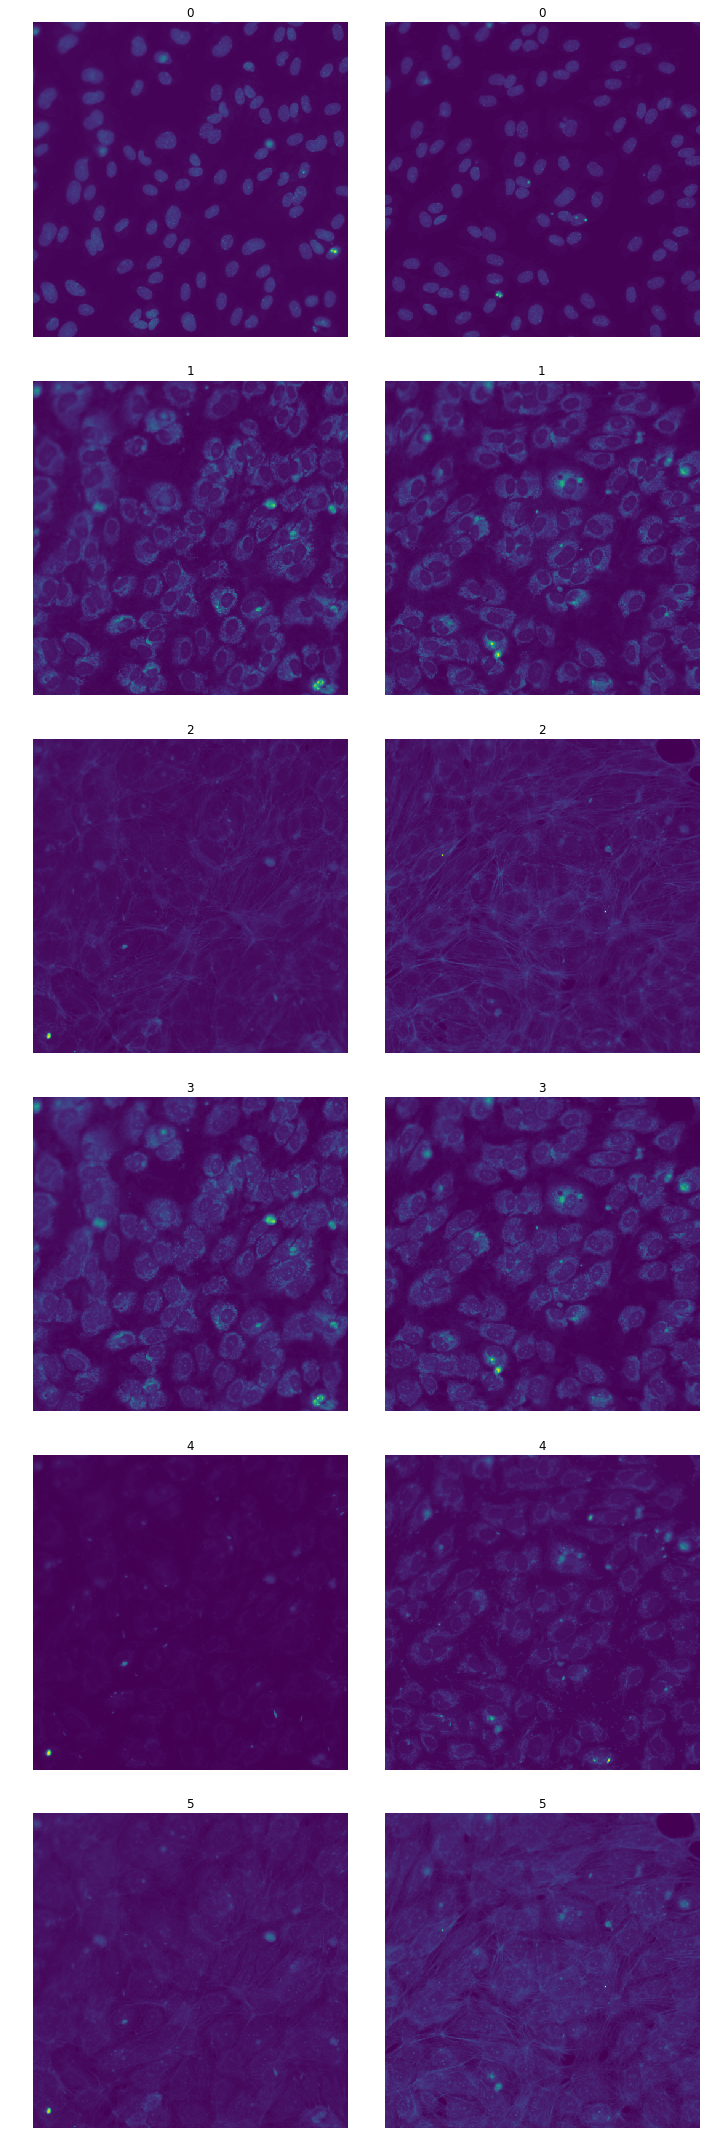

In [50]:
plot_two_imgs_by_channel(neg_l_l_imgs, b_crop=False)

Pretty close match except channel=4

##### Negative controls, diff plates

In [102]:
rand_exp_1 = np.random.choice(exps, 1)[0]
rand_exp_1

'HUVEC-14'

In [103]:
#by chosing the 0th element, we get site1, and all channels
#for two different experiment's negative controls
neg_pics_1 = dc.get_neg_controls_img(rand_exp_1,plate=1)[0]
neg_pics_2 = dc.get_neg_controls_img(rand_exp_1,plate=2)[0]

columns are different batches: TODO - implement col names


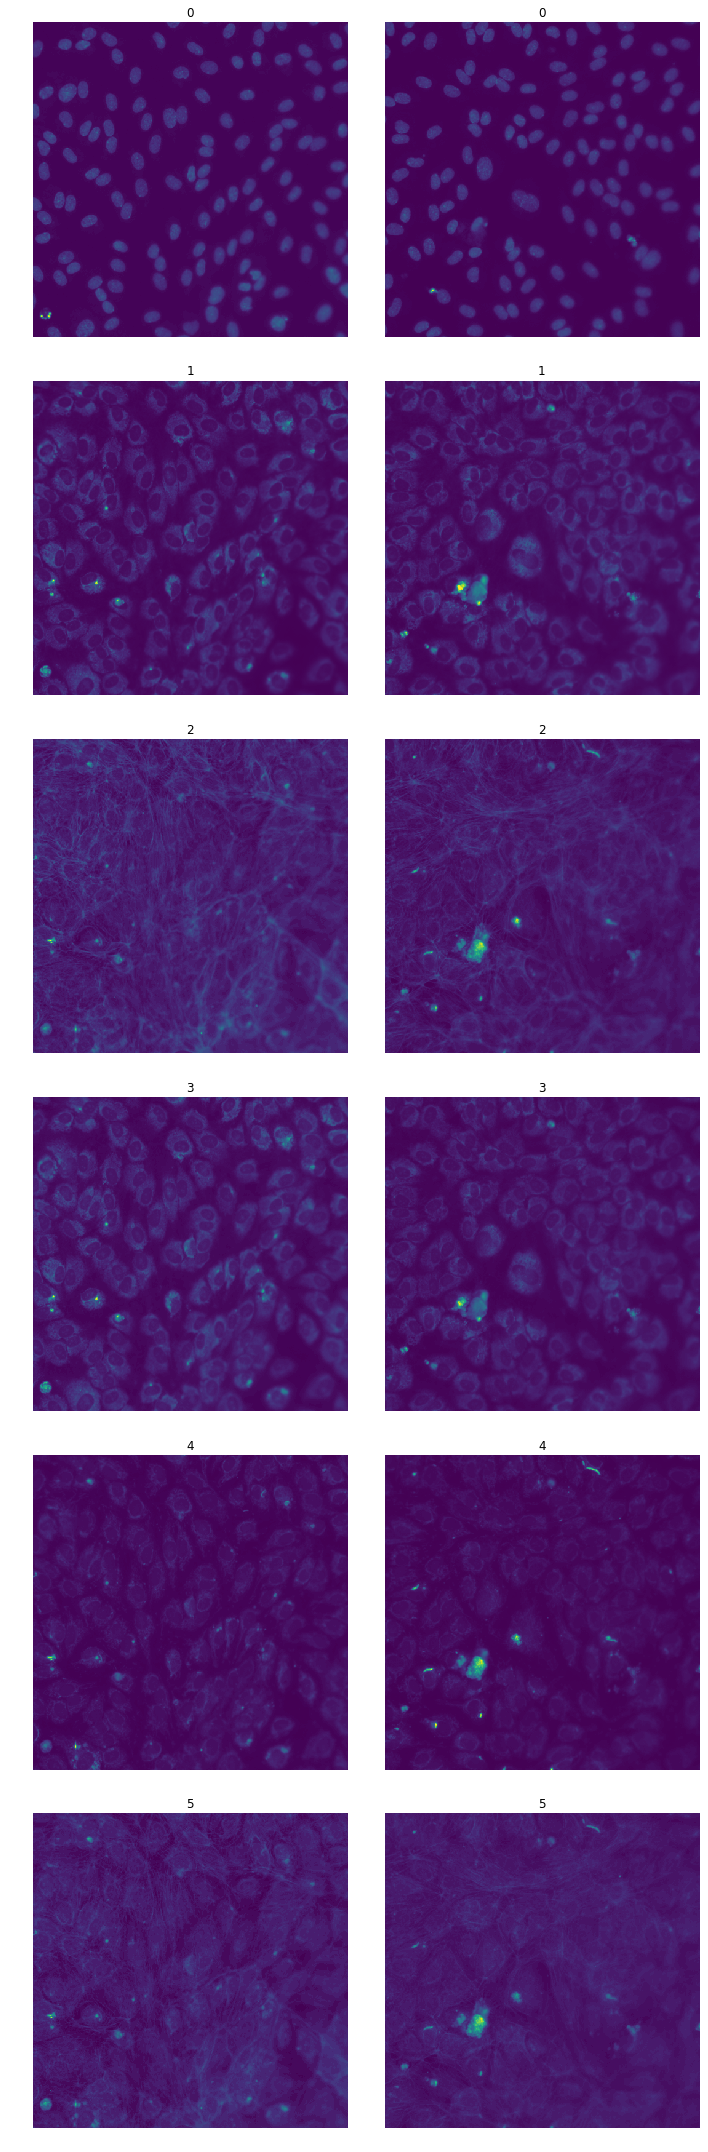

In [104]:
plot_two_imgs_by_channel([neg_pics_1, neg_pics_2], b_crop=False)

quite similar between plates on this experiment

##### two negative controls, diff experiment

In [105]:
rand_exp_1 = np.random.choice(exps, 1)[0]
rand_exp_2 = np.random.choice(exps, 1)[0]
rand_exp_1, rand_exp_2

('HUVEC-01', 'HEPG2-02')

In [110]:
neg_pics_1 = dc.get_neg_controls_img(rand_exp_1,plate=1)[0]
neg_pics_2 = dc.get_neg_controls_img(rand_exp_2,plate=1)[0]

columns are different batches: TODO - implement col names


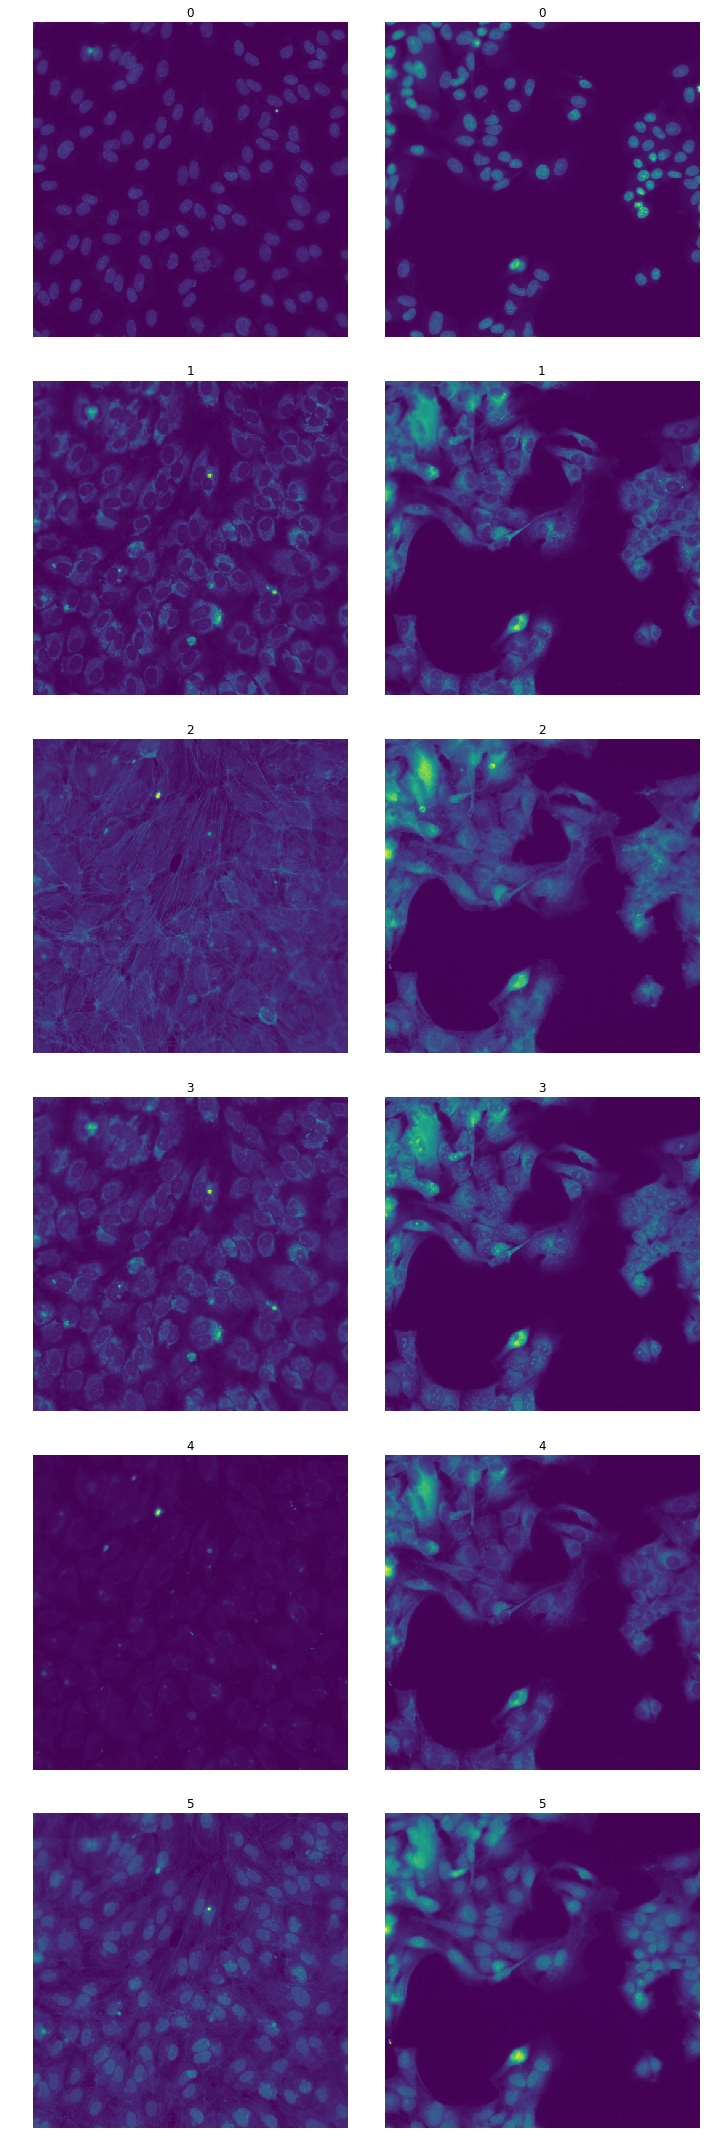

In [111]:
plot_two_imgs_by_channel([neg_pics_1, neg_pics_2], b_crop=False)

HAHAH! - quite different across experiment!

##### same sirna, dif sites

In [113]:
sirna17 = dc.get_all_sirna_df(sirna=17)

In [115]:
sirna = np.random.choice(sirna17['id_code'].tolist(), 1)[0]

columns are different batches: TODO - implement col names


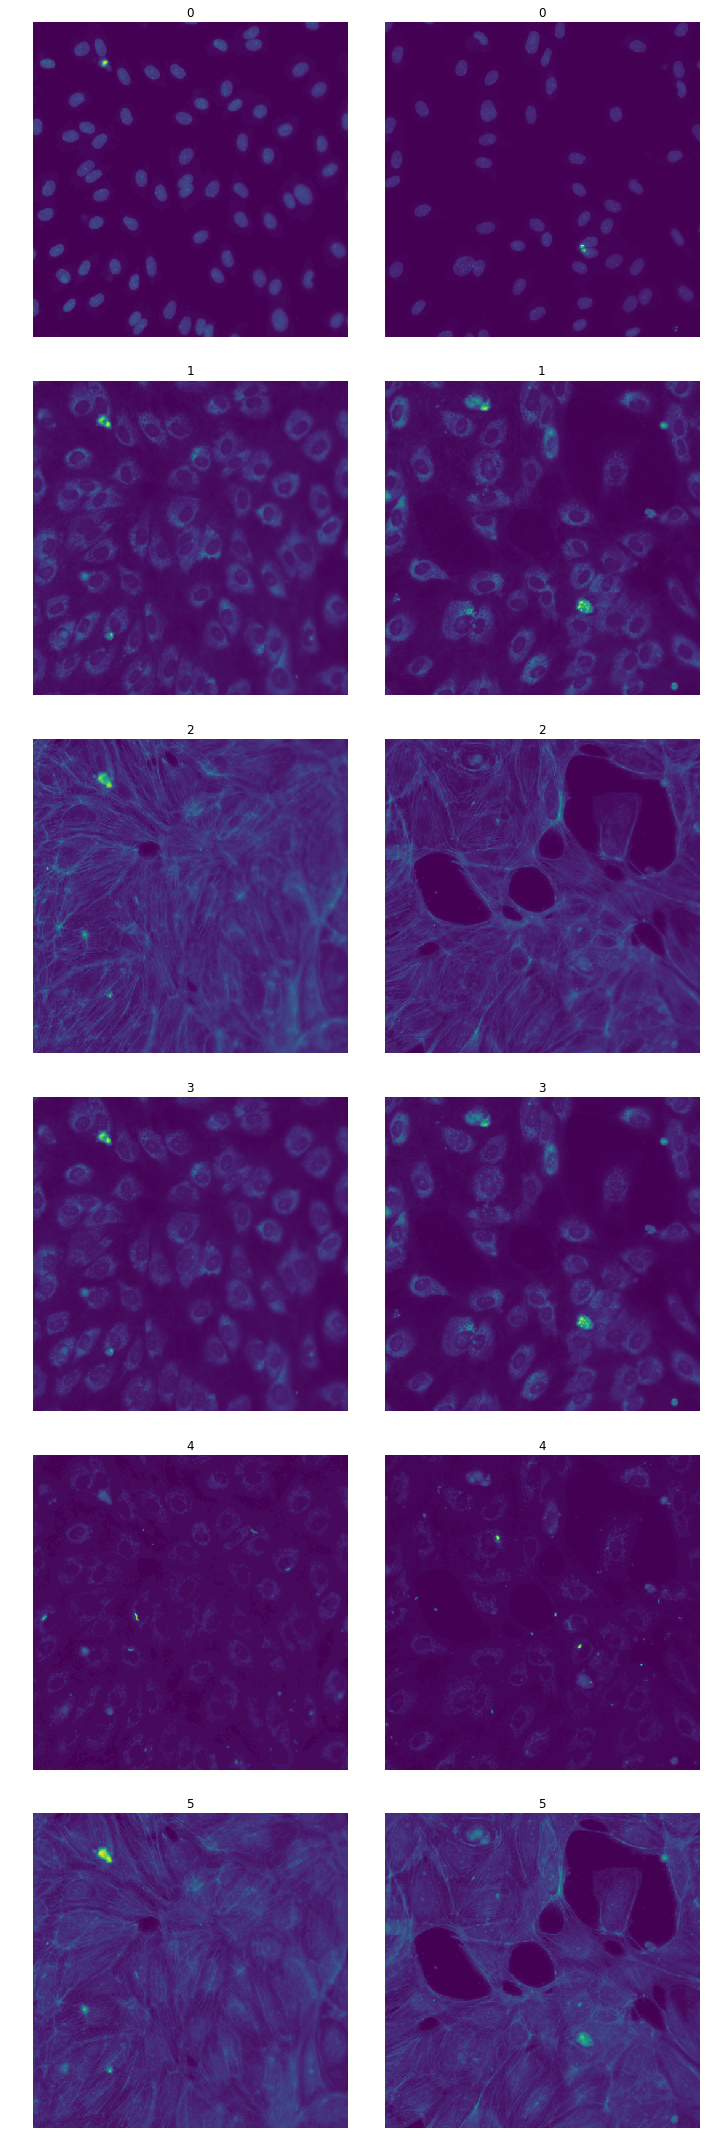

In [118]:
l_idcs = dc.ida_to_idcs(dc.train_id_to_ida(sirna))
l_l_imgs = dc.load_img_from_l_idc(l_idcs)
plot_two_imgs_by_channel(l_l_imgs, b_crop=False)

##### same sirna, diff plate

In [120]:
sirna_rand = dc.get_all_sirna_df(sirna=np.random.choice([e for e in range(1000)])[[0]])

IndexError: invalid index to scalar variable.